In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape[1:]

(32, 32, 3)

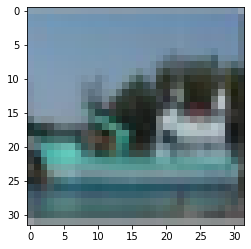

In [4]:
plt.imshow(x_train[111])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# mean = np.mean(x_train,axis=(0,1,2,3))
# std = np.std(x_train,axis=(0,1,2,3))
# x_train = (x_train-mean)/(std+1e-7)
# x_test = (x_test-mean)/(std+1e-7)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )
datagen.fit(x_train)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [7]:
def cifar10():
    model = Sequential()
    
    #1st layer
    model.add(Conv2D(64, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #2nd layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #3rd layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #4th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #5th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #6th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #7th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #8th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #9th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #10th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    #11 lthayer
    model.add(Conv2D(128, (1,1), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #12th layer
    model.add(Conv2D(128, (1,1), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #13th layer
    model.add(Conv2D(128, (3,3), padding='same', input_shape = x_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    #last layer
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    return model

In [8]:
model = cifar10()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
BS = 100
epochs = 10
train = {}

optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_1"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_1"].history)

Epoch 1/10
500/500 [==============================] - 180s 359ms/step - loss: 1.8079 - accuracy: 0.3336 - val_loss: 2.0015 - val_accuracy: 0.3395
Epoch 2/10
500/500 [==============================] - 179s 357ms/step - loss: 1.2781 - accuracy: 0.5383 - val_loss: 1.5992 - val_accuracy: 0.4980
Epoch 3/10
500/500 [==============================] - 179s 358ms/step - loss: 1.0289 - accuracy: 0.6357 - val_loss: 1.1325 - val_accuracy: 0.6116
Epoch 4/10
500/500 [==============================] - 179s 359ms/step - loss: 0.9018 - accuracy: 0.6848 - val_loss: 1.0962 - val_accuracy: 0.6528
Epoch 5/10
500/500 [==============================] - 179s 358ms/step - loss: 0.8006 - accuracy: 0.7231 - val_loss: 1.1399 - val_accuracy: 0.6379
Epoch 6/10
500/500 [==============================] - 180s 359ms/step - loss: 0.7418 - accuracy: 0.7469 - val_loss: 0.9523 - val_accuracy: 0.6842
Epoch 7/10
500/500 [==============================] - 179s 358ms/step - loss: 0.6912 - accuracy: 0.7640 - val_loss: 0.9663 -

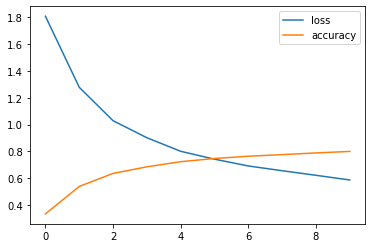

In [37]:
plt.plot(train["part_1"].history['loss'])
plt.plot(train["part_1"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [38]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_2"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_2"].history)

Epoch 1/10
500/500 [==============================] - 179s 359ms/step - loss: 0.5716 - accuracy: 0.8068 - val_loss: 0.6358 - val_accuracy: 0.7857
Epoch 2/10
500/500 [==============================] - 204s 409ms/step - loss: 0.5428 - accuracy: 0.8150 - val_loss: 0.4928 - val_accuracy: 0.8304
Epoch 3/10
500/500 [==============================] - 210s 419ms/step - loss: 0.5231 - accuracy: 0.8227 - val_loss: 0.4712 - val_accuracy: 0.8382
Epoch 4/10
500/500 [==============================] - 210s 420ms/step - loss: 0.4983 - accuracy: 0.8309 - val_loss: 0.5646 - val_accuracy: 0.8100
Epoch 5/10
500/500 [==============================] - 210s 419ms/step - loss: 0.4725 - accuracy: 0.8405 - val_loss: 0.4910 - val_accuracy: 0.8367
Epoch 6/10
500/500 [==============================] - 210s 419ms/step - loss: 0.4655 - accuracy: 0.8433 - val_loss: 0.4992 - val_accuracy: 0.8324
Epoch 7/10
500/500 [==============================] - 209s 419ms/step - loss: 0.4462 - accuracy: 0.8492 - val_loss: 0.4982 -

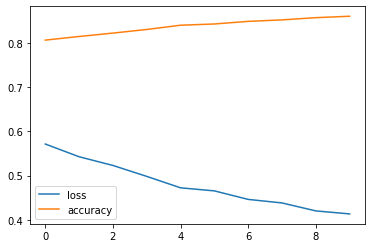

In [43]:
plt.plot(train["part_2"].history['loss'])
plt.plot(train["part_2"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [44]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_3"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_3"].history)

Epoch 1/10
500/500 [==============================] - 159s 319ms/step - loss: 0.4012 - accuracy: 0.8633 - val_loss: 0.4567 - val_accuracy: 0.8480
Epoch 2/10
500/500 [==============================] - 167s 334ms/step - loss: 0.3914 - accuracy: 0.8675 - val_loss: 0.6340 - val_accuracy: 0.7891
Epoch 3/10
500/500 [==============================] - 178s 356ms/step - loss: 0.3806 - accuracy: 0.8710 - val_loss: 0.4399 - val_accuracy: 0.8554
Epoch 4/10
500/500 [==============================] - 175s 350ms/step - loss: 0.3701 - accuracy: 0.8753 - val_loss: 0.4550 - val_accuracy: 0.8550
Epoch 5/10
500/500 [==============================] - 170s 340ms/step - loss: 0.3633 - accuracy: 0.8767 - val_loss: 0.4159 - val_accuracy: 0.8625
Epoch 6/10
500/500 [==============================] - 159s 319ms/step - loss: 0.3577 - accuracy: 0.8796 - val_loss: 0.4460 - val_accuracy: 0.8516
Epoch 7/10
500/500 [==============================] - 167s 335ms/step - loss: 0.3475 - accuracy: 0.8811 - val_loss: 0.4993 -

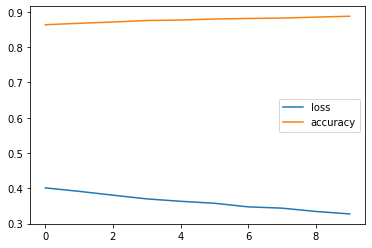

In [45]:
plt.plot(train["part_3"].history['loss'])
plt.plot(train["part_3"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [57]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_4"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_4"].history)

Epoch 1/10
500/500 [==============================] - 213s 425ms/step - loss: 0.3269 - accuracy: 0.8904 - val_loss: 0.4299 - val_accuracy: 0.8559
Epoch 2/10
500/500 [==============================] - 209s 419ms/step - loss: 0.3178 - accuracy: 0.8905 - val_loss: 0.3545 - val_accuracy: 0.8824
Epoch 3/10
500/500 [==============================] - 210s 419ms/step - loss: 0.3168 - accuracy: 0.8931 - val_loss: 0.3317 - val_accuracy: 0.8887
Epoch 4/10
500/500 [==============================] - 210s 419ms/step - loss: 0.3087 - accuracy: 0.8959 - val_loss: 0.3496 - val_accuracy: 0.8832
Epoch 5/10
500/500 [==============================] - 210s 419ms/step - loss: 0.3004 - accuracy: 0.8979 - val_loss: 0.3507 - val_accuracy: 0.8809
Epoch 6/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2977 - accuracy: 0.8985 - val_loss: 0.3520 - val_accuracy: 0.8836
Epoch 7/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2913 - accuracy: 0.9010 - val_loss: 0.3098 -

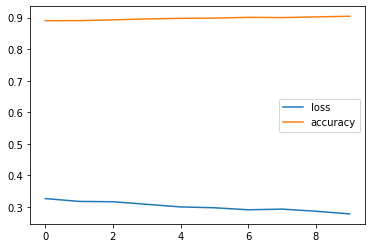

In [58]:
plt.plot(train["part_4"].history['loss'])
plt.plot(train["part_4"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [59]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_5"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_5"].history)

Epoch 1/10
500/500 [==============================] - 211s 422ms/step - loss: 0.2778 - accuracy: 0.9051 - val_loss: 0.3553 - val_accuracy: 0.8797
Epoch 2/10
500/500 [==============================] - 210s 420ms/step - loss: 0.2720 - accuracy: 0.9064 - val_loss: 0.3469 - val_accuracy: 0.8840
Epoch 3/10
500/500 [==============================] - 210s 420ms/step - loss: 0.2715 - accuracy: 0.9077 - val_loss: 0.3520 - val_accuracy: 0.8826
Epoch 4/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2669 - accuracy: 0.9091 - val_loss: 0.3016 - val_accuracy: 0.9036
Epoch 5/10
500/500 [==============================] - 210s 421ms/step - loss: 0.2633 - accuracy: 0.9091 - val_loss: 0.3026 - val_accuracy: 0.9015
Epoch 6/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2627 - accuracy: 0.9107 - val_loss: 0.3004 - val_accuracy: 0.9005
Epoch 7/10
500/500 [==============================] - 210s 420ms/step - loss: 0.2563 - accuracy: 0.9115 - val_loss: 0.2832 -

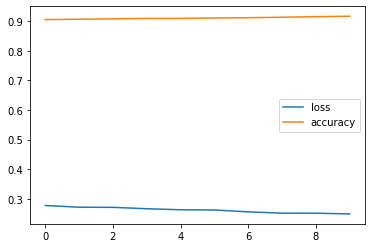

In [60]:
plt.plot(train["part_5"].history['loss'])
plt.plot(train["part_5"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [61]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_6"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_6"].history)

Epoch 1/10
500/500 [==============================] - 210s 421ms/step - loss: 0.2483 - accuracy: 0.9158 - val_loss: 0.3519 - val_accuracy: 0.8821
Epoch 2/10
500/500 [==============================] - 209s 419ms/step - loss: 0.2420 - accuracy: 0.9172 - val_loss: 0.3532 - val_accuracy: 0.8853
Epoch 3/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2448 - accuracy: 0.9160 - val_loss: 0.2702 - val_accuracy: 0.9090
Epoch 4/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2364 - accuracy: 0.9197 - val_loss: 0.3352 - val_accuracy: 0.8912
Epoch 5/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2338 - accuracy: 0.9201 - val_loss: 0.3080 - val_accuracy: 0.8969
Epoch 6/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2334 - accuracy: 0.9209 - val_loss: 0.2781 - val_accuracy: 0.9079
Epoch 7/10
500/500 [==============================] - 210s 419ms/step - loss: 0.2294 - accuracy: 0.9225 - val_loss: 0.3391 -

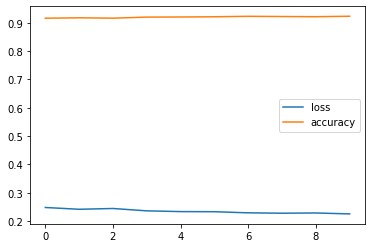

In [62]:
plt.plot(train["part_6"].history['loss'])
plt.plot(train["part_6"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [63]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_7"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_7"].history)

Epoch 1/10
500/500 [==============================] - 197s 394ms/step - loss: 0.2254 - accuracy: 0.9218 - val_loss: 0.2733 - val_accuracy: 0.9091
Epoch 2/10
500/500 [==============================] - 178s 357ms/step - loss: 0.2182 - accuracy: 0.9251 - val_loss: 0.3240 - val_accuracy: 0.8972
Epoch 3/10
500/500 [==============================] - 178s 357ms/step - loss: 0.2199 - accuracy: 0.9253 - val_loss: 0.2584 - val_accuracy: 0.9141
Epoch 4/10
500/500 [==============================] - 181s 363ms/step - loss: 0.2180 - accuracy: 0.9253 - val_loss: 0.2697 - val_accuracy: 0.9120
Epoch 5/10
500/500 [==============================] - 181s 362ms/step - loss: 0.2153 - accuracy: 0.9268 - val_loss: 0.2773 - val_accuracy: 0.9085
Epoch 6/10
500/500 [==============================] - 178s 357ms/step - loss: 0.2157 - accuracy: 0.9260 - val_loss: 0.2829 - val_accuracy: 0.9058
Epoch 7/10
500/500 [==============================] - 180s 360ms/step - loss: 0.2144 - accuracy: 0.9258 - val_loss: 0.2770 -

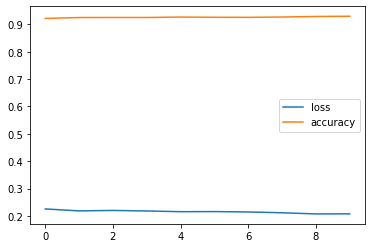

In [100]:
plt.plot(train["part_7"].history['loss'])
plt.plot(train["part_7"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [67]:
optim = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
             optimizer = optim,
             metrics = ['accuracy'])

train["part_8"] = model.fit(datagen.flow(x_train, y_train, batch_size=BS),
                            epochs = epochs,verbose=1,
                            validation_data=(x_test,y_test))

model.save("SimpleNet_trained_model.h5")
print(train["part_8"].history)

Epoch 1/10
500/500 [==============================] - 175s 351ms/step - loss: 0.2032 - accuracy: 0.9301 - val_loss: 0.2831 - val_accuracy: 0.9094
Epoch 2/10
500/500 [==============================] - 174s 349ms/step - loss: 0.2003 - accuracy: 0.9316 - val_loss: 0.3267 - val_accuracy: 0.8967
Epoch 3/10
500/500 [==============================] - 175s 350ms/step - loss: 0.2018 - accuracy: 0.9301 - val_loss: 0.3062 - val_accuracy: 0.9018
Epoch 4/10
500/500 [==============================] - 174s 348ms/step - loss: 0.2023 - accuracy: 0.9315 - val_loss: 0.2699 - val_accuracy: 0.9117
Epoch 5/10
500/500 [==============================] - 179s 358ms/step - loss: 0.2000 - accuracy: 0.9311 - val_loss: 0.2625 - val_accuracy: 0.9118
Epoch 6/10
500/500 [==============================] - 179s 358ms/step - loss: 0.1979 - accuracy: 0.9324 - val_loss: 0.3210 - val_accuracy: 0.8989
Epoch 7/10
500/500 [==============================] - 181s 362ms/step - loss: 0.1983 - accuracy: 0.9313 - val_loss: 0.3069 -

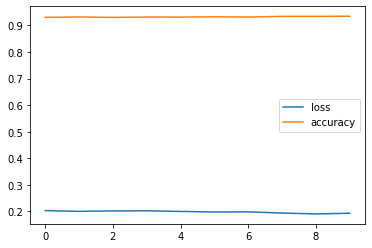

In [99]:
plt.plot(train["part_8"].history['loss'])
plt.plot(train["part_8"].history['accuracy'])
# plt.plot(train["part_1"].history['val_loss'])
# plt.plot(train["part_1"].history['val_accuracy'])
plt.legend(['loss','accuracy'])

In [95]:
a = []
for i in train:
    a.append(train[i].history['accuracy'])
acc = []
for i in a:
    for j in i:
        acc.append(j)

In [96]:
a = []
for i in train:
    a.append(train[i].history['loss'])
loss = []
for i in a:
    for j in i:
        loss.append(j)

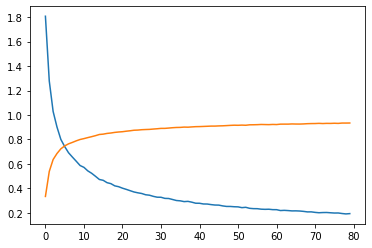

In [98]:
plt.plot(loss)
plt.plot(acc)